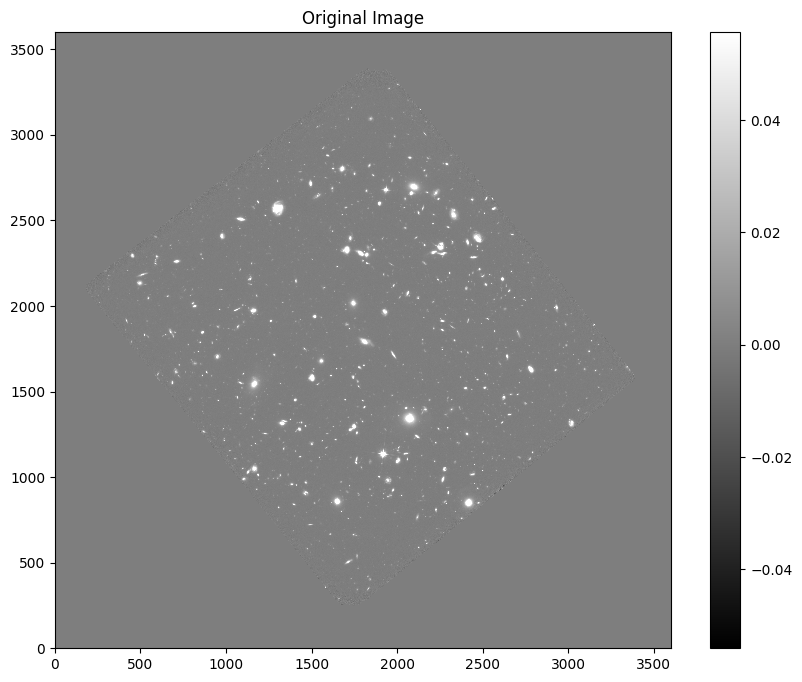

Global background: 0.0
Global noise: 0.0005398219218477607


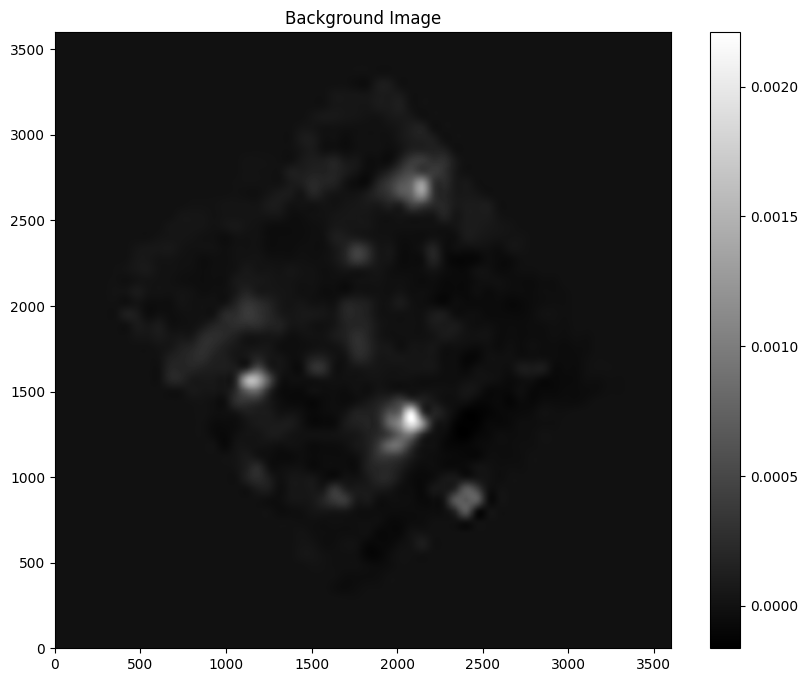

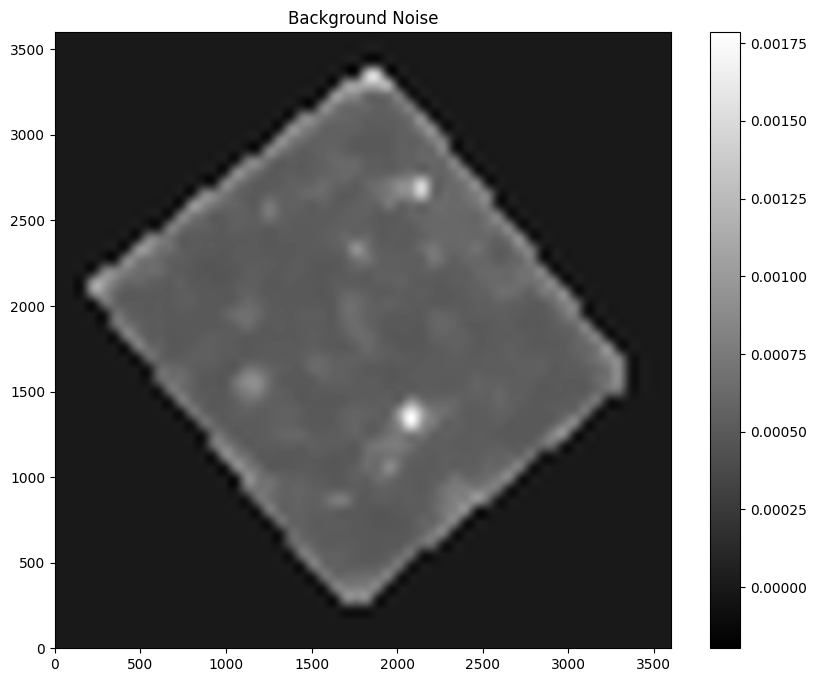

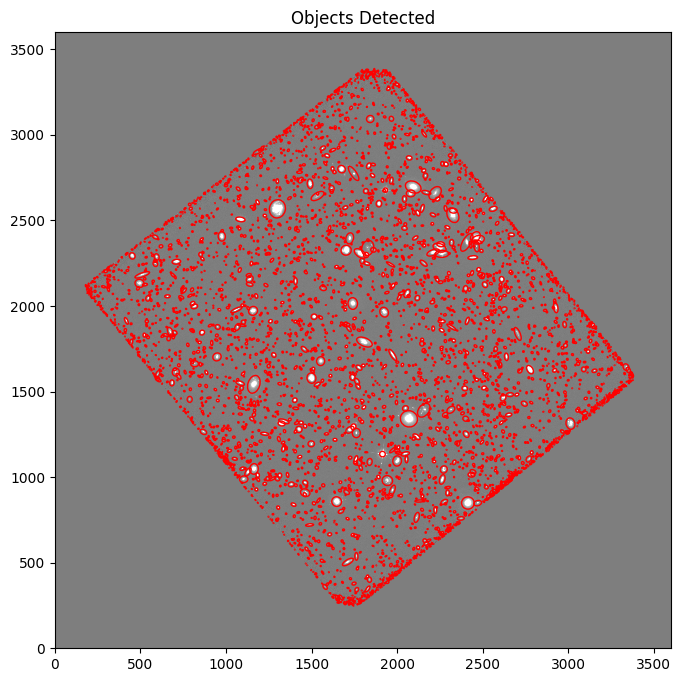

In [5]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rcParams
import sep

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

image_path = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
data = fits.getdata(image_path)

data = data.byteswap().newbyteorder()

m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title("Original Image")
plt.savefig("original_image.png") 
plt.show()

bkg = sep.Background(data)

print("Global background:", bkg.globalback)
print("Global noise:", bkg.globalrms)

bkg_image = bkg.back()

plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Image")
plt.savefig("background_image.png")
plt.show()

bkg_rms = bkg.rms()

plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Noise")
plt.savefig("background_noise_2.png")
plt.show()

data_sub = data - bkg

objects = sep.extract(data_sub, 3.0, err=bkg.globalrms, gain=1.0)

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Objects Detected")
plt.savefig("objects_detected_2.png")
plt.show()

f125w_path = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
f160w_path = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

f125w_data = fits.getdata(f125w_path)
f160w_data = fits.getdata(f160w_path)

rgb_image = np.stack([f160w_data, f125w_data, data], axis=-1)
